In [1]:
pacotes <- c("IntroCompFinR", "tidyquant","tidyverse")
for(i in pacotes){
    suppressPackageStartupMessages(library(i, character.only = T))
}
options(warn = -1)

In [2]:
acoes <- c("TRPL4.SA","ITUB4.SA", "GRND3.SA", "ABCB4.SA", "WEGE3.SA")
data_inicio <- Sys.Date()-365*8
ret_d <- tq_get(acoes, from = data_inicio) %>%
  group_by(symbol) %>%
  tq_transmute(select = adjusted, mutate_fun = dailyReturn) %>%
  spread(key = symbol, value = daily.returns)

In [3]:
retorno_medio <- colMeans(ret_d[,-1])*252
print(retorno_medio)

 ABCB4.SA  GRND3.SA  ITUB4.SA  TRPL4.SA  WEGE3.SA 
0.1665540 0.2197034 0.1947341 0.3334536 0.3985385 


In [4]:
covar <- cov(ret_d[,-1], use = "na.or.complete")*252
covar

,ABCB4.SA,GRND3.SA,ITUB4.SA,TRPL4.SA,WEGE3.SA
ABCB4.SA,0.11969502,0.03658851,0.06097996,0.02795728,0.03037572
GRND3.SA,0.03658851,0.10033373,0.03945906,0.02328306,0.02864024
ITUB4.SA,0.06097996,0.03945906,0.10848702,0.03329467,0.03803315
TRPL4.SA,0.02795728,0.02328306,0.03329467,0.08318835,0.01836974
WEGE3.SA,0.03037572,0.02864024,0.03803315,0.01836974,0.10644451


In [5]:
matriz_cor <- cor(ret_d[,-1], use = "na.or.complete")
matriz_cor

,ABCB4.SA,GRND3.SA,ITUB4.SA,TRPL4.SA,WEGE3.SA
ABCB4.SA,1.0000000,0.3338745,0.5351311,0.2801726,0.2691082
GRND3.SA,0.3338745,1.0000000,0.3782112,0.2548504,0.2771351
ITUB4.SA,0.5351311,0.3782112,1.0000000,0.3504730,0.3539254
TRPL4.SA,0.2801726,0.2548504,0.3504730,1.0000000,0.1952137
WEGE3.SA,0.2691082,0.2771351,0.3539254,0.1952137,1.0000000


In [31]:
tx_livre_risco <- 0.2

In [32]:
short_selling <- T

In [33]:
carteira_eficiente <- tangency.portfolio(retorno_medio, covar, tx_livre_risco, shorts = short_selling)

carteira_eficiente

Call:
tangency.portfolio(er = retorno_medio, cov.mat = covar, risk.free = tx_livre_risco, 
    shorts = short_selling)

Portfolio expected return:     0.5255602 
Portfolio standard deviation:  0.3931711 
Portfolio weights:
ABCB4.SA GRND3.SA ITUB4.SA TRPL4.SA WEGE3.SA 
 -0.3497  -0.1062  -0.4023   0.8466   1.0117 

In [34]:
sharpe <- (carteira_eficiente$er-tx_livre_risco)/carteira_eficiente$sd
sharpe

[1] 0.8280368

In [35]:
carteira_min_risco <- globalMin.portfolio(retorno_medio, covar, shorts = short_selling)

carteira_min_risco

Call:
globalMin.portfolio(er = retorno_medio, cov.mat = covar, shorts = short_selling)

Portfolio expected return:     0.2933044 
Portfolio standard deviation:  0.210483 
Portfolio weights:
ABCB4.SA GRND3.SA ITUB4.SA TRPL4.SA WEGE3.SA 
  0.1272   0.2204   0.0666   0.3492   0.2365 

In [36]:
npor <- 100
fronteira_eficiente <- efficient.frontier(retorno_medio, covar, npor, shorts = short_selling)

fronteira_eficiente

Call:
efficient.frontier(er = retorno_medio, cov.mat = covar, nport = npor, 
    shorts = short_selling)

Frontier portfolios' expected returns and standard deviations
   port 1 port 2 port 3 port 4 port 5 port 6 port 7 port 8 port 9 port 10
ER 0.4512 0.4490 0.4469 0.4448 0.4427 0.4405 0.4384 0.4363 0.4341  0.4320
SD 0.3086 0.3064 0.3042 0.3020 0.2998 0.2977 0.2955 0.2934 0.2913  0.2892
   port 11 port 12 port 13 port 14 port 15 port 16 port 17 port 18 port 19
ER  0.4299  0.4278  0.4256  0.4235  0.4214  0.4193  0.4171  0.4150  0.4129
SD  0.2871  0.2851  0.2830  0.2810  0.2790  0.2770  0.2751  0.2731  0.2712
   port 20 port 21 port 22 port 23 port 24 port 25 port 26 port 27 port 28
ER  0.4108  0.4086  0.4065  0.4044  0.4023  0.4001  0.3980  0.3959  0.3938
SD  0.2693  0.2674  0.2655  0.2637  0.2619  0.2601  0.2583  0.2565  0.2548
   port 29 port 30 port 31 port 32 port 33 port 34 port 35 port 36 port 37
ER  0.3916  0.3895  0.3874  0.3853  0.3831   0.381  0.3789  0.3767  0.3746
SD  0.2531

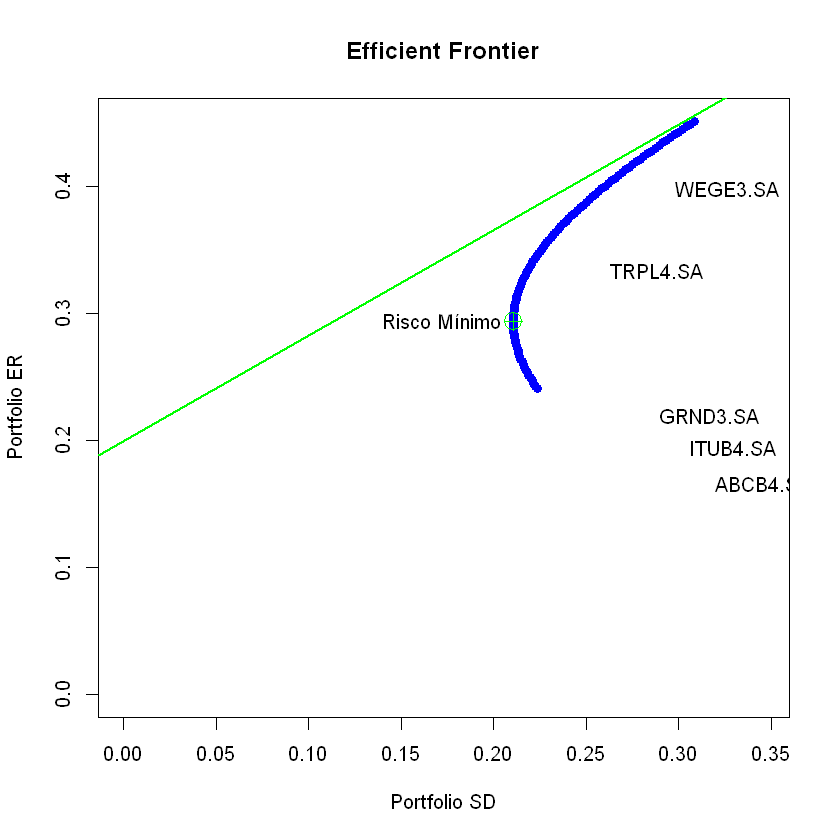

In [37]:
plot(fronteira_eficiente, plot.asset = TRUE,
     col = ifelse(fronteira_eficiente$er == carteira_eficiente$er,"red",
                  "blue"), pch = 16)
points(carteira_min_risco$sd, carteira_min_risco$er, col = "green", pch = 10, cex = 2)
points(carteira_eficiente$sd, carteira_eficiente$er, col = "red", pch = 10, cex = 2)
text(carteira_min_risco$sd, carteira_min_risco$er, labels = "Risco Mínimo", pos = 2)
text(carteira_eficiente$sd, carteira_eficiente$er, labels = "Carteira Eficiente", pos = 2)
tangente <- (carteira_eficiente$er - tx_livre_risco)/carteira_eficiente$sd
abline(a = tx_livre_risco, b = tangente, col = "green", lwd = 2)

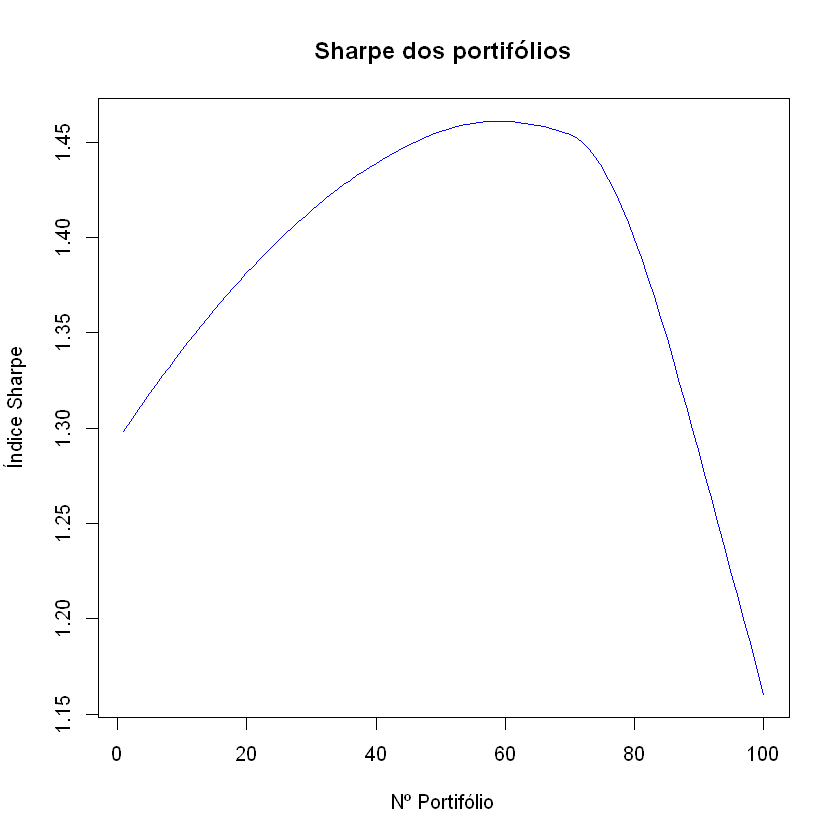

In [14]:
plot(1:npor, (fronteira_eficiente$er - tx_livre_risco)/fronteira_eficiente$sd,
     col = "blue", ylab = "Índice Sharpe", xlab = "Nº Portifólio", type = 'l',
    main = "Sharpe dos portifólios")
abline(h = 0)